In [18]:
#Ve strojovém učení často pracujeme i s jinými než textovými daty, například s obrázky. Práci s obrázky si vyzkoušíš v tomto úkolu. Jedním z nejznámějších datasetů je MNIST, který obsahuje obrázky rukou psaných číslic. K obrázkou jsou k dispozici i labels, tj. čísla, která na obrázku jsou. Tento dataset je přímo součástí modulu scikitlearn, a to ve formě číselné matice. Obrázky mají nízké rozlišení (8x8 pixelů, tj. každý obrázek se skládá 64 "políček" - 8 políček v 8 řádích, kterým lze přiřadit barvu) a je černobílý.

#Tvým úkolem bude vytvořit model, který dokáže rozpoznat, jaké číslo je na každém z obrázků, přičemž využijeme algoritmus Support Vector Machine (SVM). Dataset si můžeš načíst s využitím následujícího kódu. Kód uloží data, která chceme zpracovat, do proměnné data. Čísla, která na obrázích skutečně jsou (tj. správné odpovědi) jsou v proměnné y.

In [46]:
import pandas
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import (accuracy_score,ConfusionMatrixDisplay)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC, SVC

digits = datasets.load_digits()
y = digits.target
data = digits.images
data

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

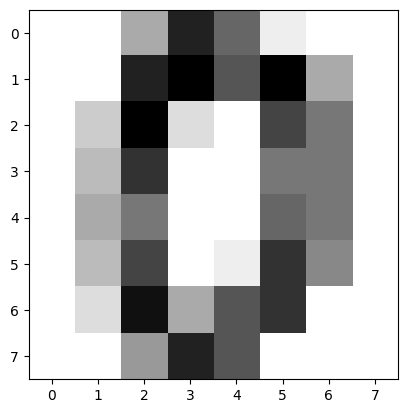

In [20]:
plt.imshow(data[0], cmap=plt.cm.gray_r)

In [21]:
n_samples = len(data)
data = data.reshape([n_samples, -1])
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [22]:
# Napiš kód, kterým vytvoříš model, který bude klasifikovat obrázek do správné skupiny. 
# Rozděl data na testovací a trénovací pomocí metody train_test_split, přičemž nastav parametry test_size=0.3 a random_state=42. Použij stejné názvy proměnných, jaké jsme používali v lekci, tj. X_train, X_test, y_train, y_test.


In [34]:
X_train, X_test, y_train, y_test = train_test_split(data,y, test_size = 0.3, random_state = 42)

In [39]:
#Použij klasifikátor SVC a jako kernel použij linear. Parametr decision_function_shape nenastavuj a využij výchozí hodnotu, tj. ovo. Nenastavuj ani žádné další parametry.
clf = SVC(kernel = "linear") #decision_function_shape="ovo"

In [40]:
#Natrénuj model s využitím metody fit() a nakonec metodou predict() vytvoř pole predikcí pro testovací data, které pojmenuj y_pred.
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

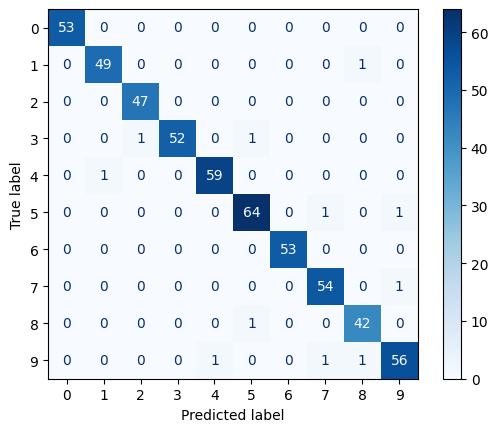

In [44]:
#Zjisti hodnotu metriky accuracy (měla by ti vyjít přibližně 0.9796) a matici záměn.
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,cmap=plt.cm.Blues)

In [42]:
# metrika accuracy
accuracy_score(y_test, y_pred)

0.9796296296296296

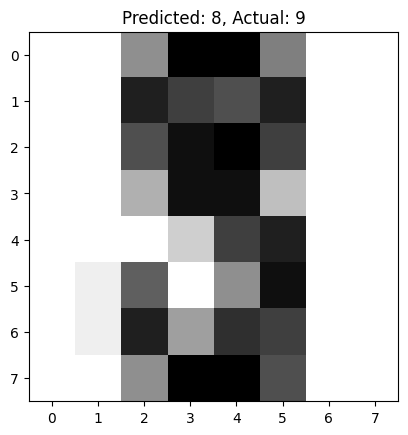

In [43]:
for i in range(0, len(y_pred)):
    # Podmínka, která porovná predikovanou hodnotu pro i-tý obrázek a skutečnou hodnotu pro i-tý obrázek
    if y_test[i] != y_pred[i]:
        image = X_test[i]
        # Obrázek převedeme zpět na matici 8x8
        image = image.reshape(8, 8)
        # Příkaz na zobrazení obrázku
        plt.imshow(image, cmap=plt.cm.gray_r)
        # Grafu dáme titulek, který porovnává predikovanou a skutečnou hodnotu
        plt.title(f'Predicted: {y_pred[i]}, Actual: {y_test[i]}')
        # Obrázek uložíme do souboru
        plt.savefig(f"{i}.png")